This is a Julia Notebook. Enjoy 

In [7]:
using PyPlot;

Now lets add my "Basis Functions" Function

In [8]:
function BF(p, u, t)                                                            # Función BS [Basis Functions] para generar las Shape Functions
    l = length(t)                                                               # Longitud del knot-vector
    k =  l-p-1;                                                                 # Se calcula la cantidad de shape functions
    Ns1 = zeros(length(u),k);                                                   # Prelocaliza matriz Ns1 temporal
    Res = Ns1                                                                   # Prelocaliza matriz Res
    for j = 0:p                                                                 # Ciclo para recorrer Shape functions desde grado 0
        if j == 0                                                               # Si es grado 0
            for i = 1:k                                                         # Recorre las columnas para cada Shape function
                if i < k                                                        # Si es una columna diferente a la ultima
                    Ns1[t[i] .<=  u .< t[i+1],i] = 1;                           # No se considera el knot vector derecho
                else                                                            # Else
                    Ns1[t[i] .<=  u .<= t[i+1],i] = 1;                          # Se considera el knot vector derecho
                end                                                             # Termina IF
            end                                                                 # Termina FOR
            Res = Ns1                                                           # Se guarda la matriz temporal Ns1 en Res
        else                                                                    # Else [si es grado mayor a 0]
            for i = 1:k                                                         # Se recorren las columnas de cada shape function

                utemp = u[t[i] .<=  u .< t[i+j+1]];                             # Se obtiene un vector u temporal

                anom = utemp-t[i];                                              # Se calcula el vector numerador de la variable a
                adenom = t[i+j]-t[i];                                           # Se calcula el vector denominador de la variable a

                bnom = t[i+j+1]-utemp;                                          # Se calcula el vector numerador de la variable b
                bdenom = t[i+j+1]-t[i+1];                                       # Se calcula el vector denominador de la variable b

                if adenom == 0.0
                  a = 0.0.*anom
                else
                  a = anom./adenom;                                               # Se calcula el vector a con el numerador y denominador
                end

              if bdenom == 0.0
                b = 0.0.*bnom
              else
              b = bnom./bdenom;                                               # Se calcula el vector a con el numerador y denominador
            end

                left  = a.*Ns1[t[i] .<=  u .< t[i+j+1],i]                    # Se calcula la parte izquierda de la recursion Cox-de Boor

                if i < k                                                        # Si es una columna diferente a la ultima
                    right = b.*Ns1[t[i] .<=  u .< t[i+j+1],i+1]               # No se considera el knot vector derecho
                else                                                            # Else
                    right = 0                                                   # Se considera el knot vector derecho
                end

                Res[t[i] .<=  u .< t[i+j+1],i] = left + right                  # Se calculan las shape functions en y se guardan en Res


            end                                                                 # Termina FOR
            Ns1 = Res                                                           # Se guarda la matriz temporal Ns1 en Res
        end                                                                     # Termina IF
    end                                                                         # Termina FOR
    return Res
end                                                                             # Termina función BF


Suppose we have a u vector from 0 to 1, a third order basis functions, and N Functions:

In [15]:
u = linspace(0,1,1000);
p = 3;
N_Func = 20;
t = [zeros(1,p) convert(Array{Float64},linspace(0,1,N_Func - p + 1))' ones(1,p)];

Now we create the Basis functions:

In [16]:
N = BF(p,u,t);

Let's plot the basis functions computed:

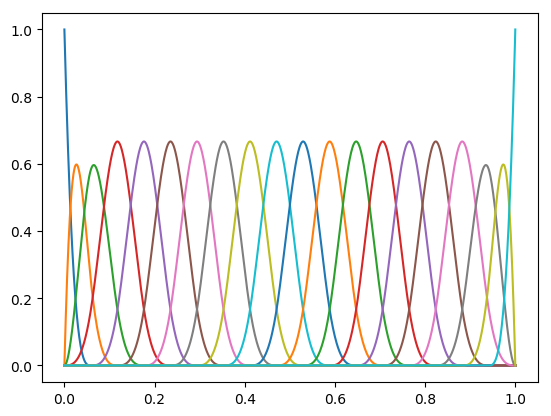

In [17]:
plot(u,N);